# Ejercicio 4.4

El objetivo es desarrollar un clasificador que a través de los atributos del dataset permita predecir la benignidad o malignidad de un tumor.

Importar del dataset desde la web y las bibliotecas básicas para empezar a trabajar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tum = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")
print(tum.shape)
print(tum.columns)

(569, 33)
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


Chequeamos cuál es atributo target dentro del dataset y modificamos a tipo numérico para facilitar la implementación de un clasificador.

In [2]:
row,col = tum.shape
print('La cantidad de filas del dataset es:',row)
print('La cantidad de columnas en el dataset es',col,'\n')

print(tum.diagnosis)
print(tum['diagnosis'].describe())    #Atributo target

tum['diag']=0     #Agregamos el atributo "diag" con valores 0 (remplazo de B) y 1 (remplazo de M)

i=0
for x in range(row):
  if tum.diagnosis[i]=='B':
    tum.diag[i]=0
  else:
    tum.diag[i]=1
  i+=1

print(tum.diag)
print(tum['diag'].describe())

La cantidad de filas del dataset es: 569
La cantidad de columnas en el dataset es 33 

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object
count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object
0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diag, Length: 569, dtype: int64
count    569.000000
mean       0.372583
std        0.483918
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diag, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Eliminamos la columna "id" por ser irrelevante al desarrollo de un clasificador, y hacemos la separación en grupos de testeo y entrenamiento utilizando todos los atributos disponibles.

In [3]:
del tum['id']
del tum['diagnosis']
del tum['Unnamed: 32']
print(tum.shape)


(569, 31)


Importamos las bibliotecas necesarias para crear los grupos de entrenamiento (70% del n total) y testeo (30% del n total).

In [4]:
from sklearn.model_selection import train_test_split    #La biblioteca de regresión logística ya se importó en el ejercicio 4.1.

train_tum, test_tum, train_targ, test_targ = train_test_split(tum, tum['diag'], test_size=0.3)
print(train_tum.shape)
print(train_targ.shape)

(398, 31)
(398,)


Aplicamos un modelo de clasificación por regresión logística.

In [5]:
from sklearn.linear_model import LogisticRegression

logreg2 = LogisticRegression(solver='lbfgs',max_iter=1000)
logreg2.fit(train_tum,train_targ)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Aplicamos un modelo de clasificación por LDA y evaluamos su performance.

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(train_tum,train_targ)

pred1 = lda.predict(test_tum)
acc1 = metrics.accuracy_score(test_targ,pred1)
prec1 = metrics.precision_score(test_targ,pred1)
f_mes1 =metrics.f1_score(test_targ,pred1)

print('La exactitud del modelo fue:',acc1)
print('La precisión del modelo fue:',prec1)
print('El valor de f-measure fue:',f_mes1)

La exactitud del modelo fue: 0.9766081871345029
La precisión del modelo fue: 1.0
El valor de f-measure fue: 0.9649122807017544


Hacemos una validación cruzada para evaluar los resultados del modelo LDA respecto a la partición de la información del dataset.

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(lda, train_tum, train_targ, scoring='accuracy', cv=cv1, n_jobs=-1)
print('La media de la exactitud es:',(np.mean(scores1)))
print('La desviación standar de la exactitud es:',(np.std(scores1)))

La media de la exactitud es: 0.9521794871794871
La desviación standar de la exactitud es: 0.03995038562289388


Visualizamos los resultados del modelo con LDA graficando la matriz de confusión.

[[112   0]
 [  4  55]]


Text(0.5, 257.44, 'Clase Predicha')

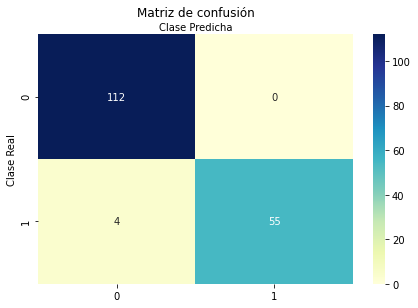

In [8]:
import seaborn as sns

mtx0=metrics.confusion_matrix(test_targ,pred1)
print(mtx0)

clases=[0,1]           #Benigno=0  Maligno=1
fig,ax = plt.subplots()
referencias = np.arange(len(clases))
plt.xticks(referencias, clases)
plt.yticks(referencias, clases)

sns.heatmap(pd.DataFrame(mtx0), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')

Aplicamos un modelo de clasificación por k-nn y evaluamos su performance.

In [9]:
from sklearn import neighbors

k2=25   #Se tomo como parámetro inicial la raíz cuadrada de n (23) y se corrió a 25 (a prueba y error)
knn2 = neighbors.KNeighborsClassifier(n_neighbors=k2)
knn2.fit(train_tum,train_targ)

pred2 = knn2.predict(test_tum)
acc2 = metrics.accuracy_score(test_targ,pred2)
prec2 = metrics.precision_score(test_targ,pred2)
f_mes2 =metrics.f1_score(test_targ,pred2)

print('La exactitud del modelo fue:',acc2)
print('La precisión del modelo fue:',prec2)
print('El valor de f-measure fue:',f_mes2)

La exactitud del modelo fue: 0.9473684210526315
La precisión del modelo fue: 0.9629629629629629
El valor de f-measure fue: 0.9203539823008849


Hacemos una validación cruzada para evaluar los resultados del modelo K-NN respecto a la partición de la información del dataset.

In [10]:
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(knn2, train_tum, train_targ, scoring='accuracy', cv=cv2, n_jobs=-1)
print('La media de la exactitud es:',(np.mean(scores2)))
print('La desviación standar de la exactitud es:',(np.std(scores2)))

La media de la exactitud es: 0.9145299145299145
La desviación standar de la exactitud es: 0.03876530094344344


Visualizamos los resultados del modelo con K-NN graficando la matriz de confusión.

[[110   2]
 [  7  52]]


Text(0.5, 257.44, 'Clase Predicha')

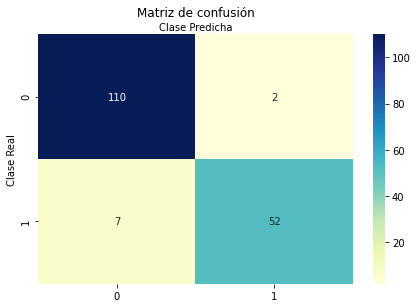

In [11]:
from sklearn.metrics import confusion_matrix

mtx1=metrics.confusion_matrix(test_targ,pred2)
print(mtx1)

clases=[0,1]           #Benigno=0  Maligno=1
fig,ax = plt.subplots()
referencias = np.arange(len(clases))
plt.xticks(referencias, clases)
plt.yticks(referencias, clases)

sns.heatmap(pd.DataFrame(mtx1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')

Aplicamos un modelo de clasificación por SVM con un kernel lineal y evaluamos su performance.

In [12]:
from sklearn import svm

svm = svm.SVC(kernel='linear' , gamma='auto')
svm.fit(train_tum,train_targ)

pred3 = svm.predict(test_tum)
acc3 = metrics.accuracy_score(test_targ,pred3)
prec3 = metrics.precision_score(test_targ,pred3)
f_mes3 =metrics.f1_score(test_targ,pred3)

print('La exactitud del modelo fue:',acc3)
print('La precisión del modelo fue:',prec3)
print('El valor de f-measure fue:',f_mes3)

La exactitud del modelo fue: 1.0
La precisión del modelo fue: 1.0
El valor de f-measure fue: 1.0


Hacemos una validación cruzada para evaluar los resultados del modelo SVM respecto a la partición de la información del dataset.

In [13]:
cv3 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores3 = cross_val_score(svm, train_tum, train_targ, scoring='accuracy', cv=cv3, n_jobs=-1)
print('La media de la exactitud es:',(np.mean(scores3)))
print('La desviación standar de la exactitud es:',(np.std(scores3)))

La media de la exactitud es: 1.0
La desviación standar de la exactitud es: 0.0


Visualizamos los resultados del modelo con SVM graficando la matriz de confusión.

[[112   0]
 [  0  59]]


Text(0.5, 257.44, 'Clase Predicha')

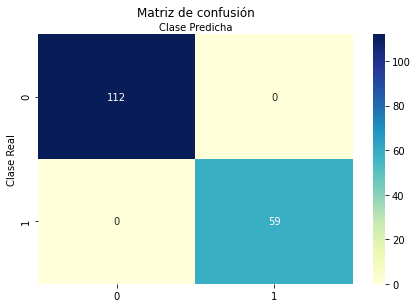

In [14]:
mtx2=metrics.confusion_matrix(test_targ,pred3)
print(mtx2)

clases=[0,1]          #Benigno=0  Maligno=1
fig,ax = plt.subplots()
referencias = np.arange(len(clases))
plt.xticks(referencias, clases)
plt.yticks(referencias, clases)

sns.heatmap(pd.DataFrame(mtx2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')

Aplicamos un modelo de clasificación por Decision Tree y evaluamos su performance.

La exactitud del modelo fue: 1.0
La precisión del modelo fue: 1.0
El valor de f-measure fue: 1.0


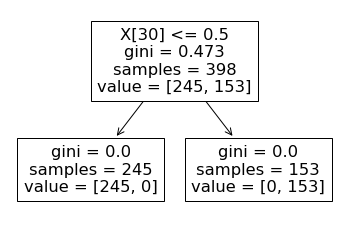

In [15]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt = dt.fit(train_tum,train_targ)

pred4 = dt.predict(test_tum)
tree.plot_tree(dt)

acc4 = metrics.accuracy_score(test_targ,pred4)
prec4 = metrics.precision_score(test_targ,pred4)
f_mes4 =metrics.f1_score(test_targ,pred4)

print('La exactitud del modelo fue:',acc4)
print('La precisión del modelo fue:',prec4)
print('El valor de f-measure fue:',f_mes4)

Hacemos una validación cruzada para evaluar los resultados del modelo Decision Tree respecto a la partición de la información del dataset.

In [16]:
cv4 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores4 = cross_val_score(dt, train_tum, train_targ, scoring='accuracy', cv=cv4, n_jobs=-1)
print('La media de la exactitud es:',(np.mean(scores4)))
print('La desviación standar de la exactitud es:',(np.std(scores4)))

La media de la exactitud es: 1.0
La desviación standar de la exactitud es: 0.0


Visualizamos los resultados del modelo de Decision Tree graficando la matriz de confusión.

[[112   0]
 [  0  59]]


Text(0.5, 257.44, 'Clase Predicha')

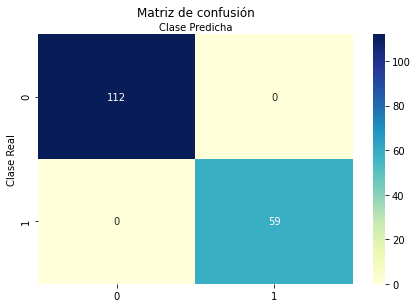

In [17]:
mtx3=metrics.confusion_matrix(test_targ,pred4)
print(mtx3)

clases=[0,1]          #Benigno=0  Maligno=1
fig,ax = plt.subplots()
referencias = np.arange(len(clases))
plt.xticks(referencias, clases)
plt.yticks(referencias, clases)

sns.heatmap(pd.DataFrame(mtx3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')

Aplicamos un modelo de clasificación de Perceptrones multicapa y evaluamos su performance.

In [27]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=0.001, max_iter=500)
mlp = mlp.fit(train_tum,train_targ)

pred5 = mlp.predict(test_tum)
acc5 = metrics.accuracy_score(test_targ,pred5)
prec5 = metrics.precision_score(test_targ,pred5)
f_mes5 =metrics.f1_score(test_targ,pred5)

print('La exactitud del modelo fue:',acc5)
print('La precisión del modelo fue:',prec5)
print('El valor de f-measure fue:',f_mes5)

La exactitud del modelo fue: 0.9941520467836257
La precisión del modelo fue: 0.9833333333333333
El valor de f-measure fue: 0.9915966386554621


Hacemos una validación cruzada para evaluar los resultados del modelo MLP respecto a la partición de la información del dataset.

In [28]:
cv5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores5 = cross_val_score(mlp, train_tum, train_targ, scoring='accuracy', cv=cv5, n_jobs=-1)
print('La media de la exactitud es:',(np.mean(scores5)))
print('La desviación standar de la exactitud es:',(np.std(scores5)))

La media de la exactitud es: 0.974102564102564
La desviación standar de la exactitud es: 0.036818018866566146


Visualizamos los resultados del modelo de Decision Tree graficando la matriz de confusión.

[[111   1]
 [  0  59]]


Text(0.5, 257.44, 'Clase Predicha')

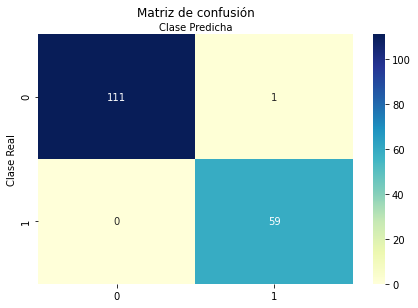

In [29]:
mtx4=metrics.confusion_matrix(test_targ,pred5)
print(mtx4)

clases=[0,1]          #Benigno=0  Maligno=1
fig,ax = plt.subplots()
referencias = np.arange(len(clases))
plt.xticks(referencias, clases)
plt.yticks(referencias, clases)

sns.heatmap(pd.DataFrame(mtx4), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')